#Important files


In [107]:
import pandas as pd
import matplotlib.pylab as plb
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#Data set


In [108]:
data = pd.read_csv("/content/aqueous solubility dataset (1).csv")
data


,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...
1123,halothane,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


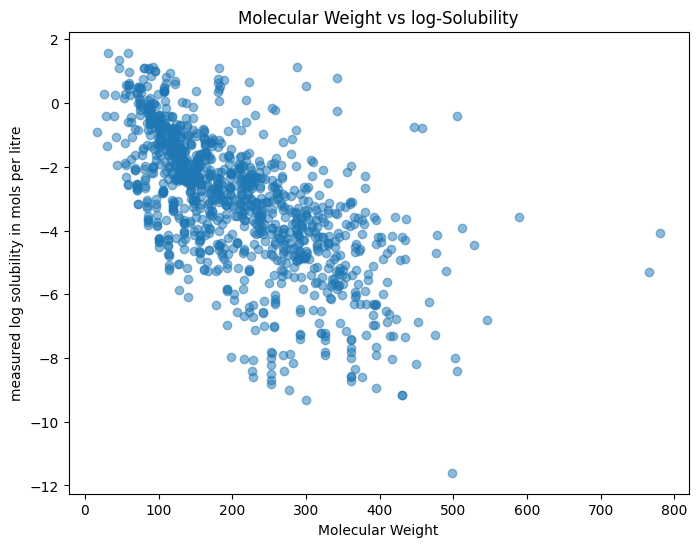

In [109]:
#Molecular Weight vs. measured log solubility
plb.figure(figsize=(8, 6))
plb.scatter(data['Molecular Weight'], data['measured log solubility in mols per litre'], alpha=0.5)
plb.xlabel('Molecular Weight')
plb.ylabel('measured log solubility in mols per litre')
plb.title('Molecular Weight vs log-Solubility')
plb.show()


**OBSERVATIONS**

1. As molecular weight is increasing the log solubility of the solution is decreasing i.e an inverse relation can be seen between them
2. The data is mostly clustered around the molecular weights 100 to 400

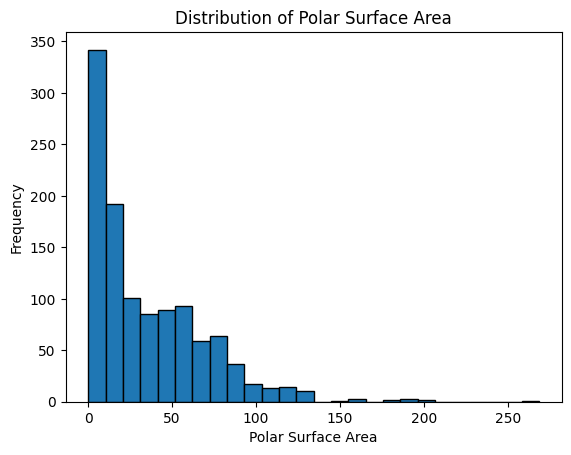

In [110]:
plb.figure()
plb.hist(data['Polar Surface Area'], bins='auto',edgecolor="black")
plb.xlabel('Polar Surface Area')
plb.ylabel('Frequency')
plb.title('Distribution of Polar Surface Area')
plb.show()

**Observation**

1. Polar surface area is highly positively skewed

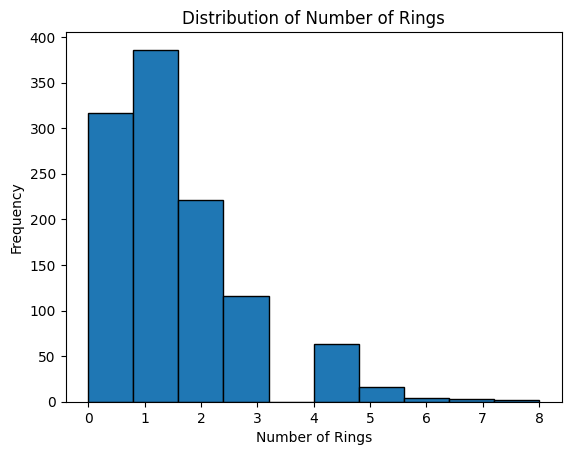

In [111]:
#histogram of the Number of Rings
plb.hist(data['Number of Rings'],edgecolor='black')
plb.xlabel('Number of Rings')
plb.ylabel('Frequency')
plb.title('Distribution of Number of Rings')
plb.show()

**Observations**

1. the number of rings is positively skewed
2. The maximum number of rings is 1 and the minimum being 8


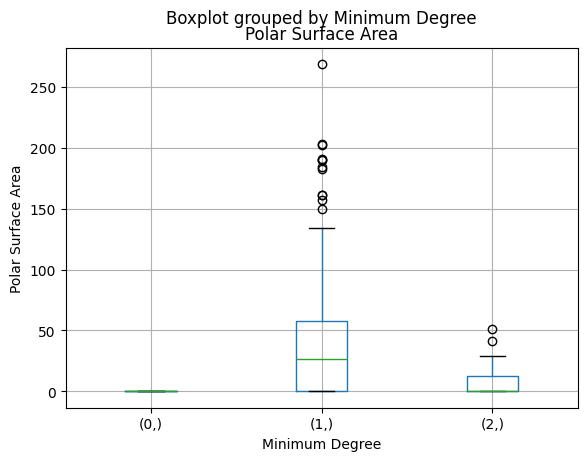

In [112]:
#Polar Surface Area by Minimum Degree
data.boxplot(column=['Polar Surface Area'], by=['Minimum Degree'])
plb.xlabel('Minimum Degree')
plb.ylabel('Polar Surface Area')
plb.title('Polar Surface Area')
plb.show()


##Data preparation

In [113]:
y = data["measured log solubility in mols per litre"]
x = data[["Molecular Weight","Polar Surface Area"]]
x
data.isnull().sum()


,0
Compound ID,0
Minimum Degree,0
Molecular Weight,0
Number of H-Bond Donors,0
Number of Rings,0
Number of Rotatable Bonds,0
Polar Surface Area,0
measured log solubility in mols per litre,0
smiles,0


In [114]:
y

,measured log solubility in mols per litre
0,-0.770
1,-3.300
2,-2.060
3,-7.870
4,-1.330
...,...
1123,-1.710
1124,0.106
1125,-3.091
1126,-3.180


## test and training data

In [115]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)
ytest

,measured log solubility in mols per litre
1091,-2.540
898,-2.253
739,-2.484
140,-2.540
1019,-7.200
...,...
336,-4.600
429,-5.259
12,-2.680
1036,-2.593


In [116]:
xtrain

,Molecular Weight,Polar Surface Area
876,122.167,20.23
712,74.123,9.23
554,207.070,0.00
688,213.310,45.15
780,252.316,0.00
...,...,...
121,114.232,0.00
1044,110.181,0.00
1095,288.255,107.22
860,137.138,39.19


## Linear Regression


### linear regression on training dataset

In [117]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)
coefarr=reg.coef_
print(reg.coef_)

[-0.01821441  0.03230611]


The result array represents the coefficient values of Molecular Weight and Polar Surface Area.

1. Molecular Weight= -0.01886668
2. Polar Surface Area = 0.03445577

On increasing 1 unit of **molecular weight** the log solubility **decreases** by 0.01886668

On increasing 1 unit of **Polar Surface Area** the log solubility **increases** by 0.03445577

Text(0.5, 1.0, 'Residual Plot')

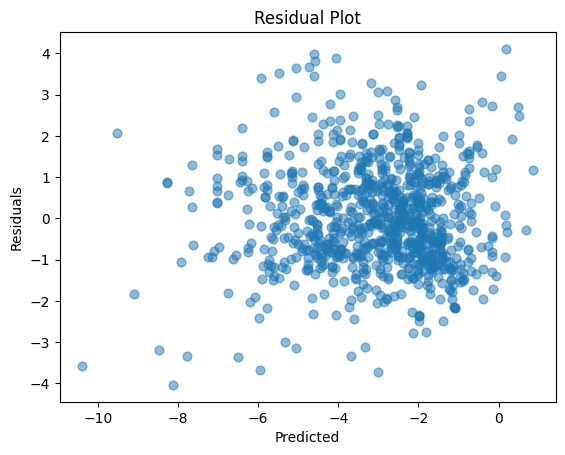

In [118]:
plb.scatter(reg.predict(xtrain),reg.predict(xtrain)-ytrain,s=40,alpha=0.5)
plb.xlabel("Predicted")
plb.ylabel("Residuals")
plb.title("Residual Plot")

Text(0.5, 1.0, 'Actual vs Predicted')

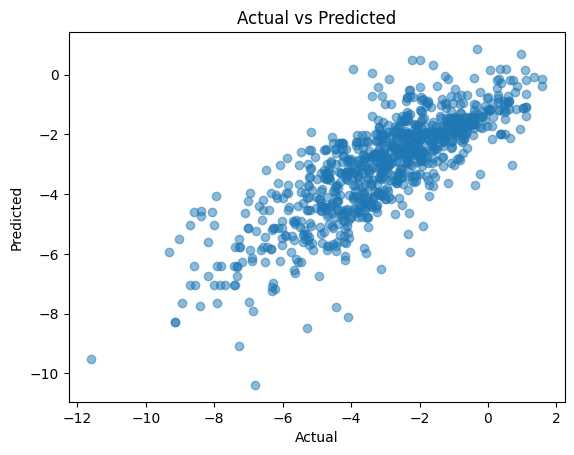

In [119]:
plb.scatter(ytrain,ytrainpred,alpha=0.5)
plb.xlabel("Actual")
plb.ylabel("Predicted")
plb.title("Actual vs Predicted")

###Linear Regression on testing data


In [120]:
ytest_pred=reg.predict(xtest)
mse_test=mean_squared_error(ytest,ytest_pred)
r2_test=r2_score(ytest,ytest_pred)

### data visualisation

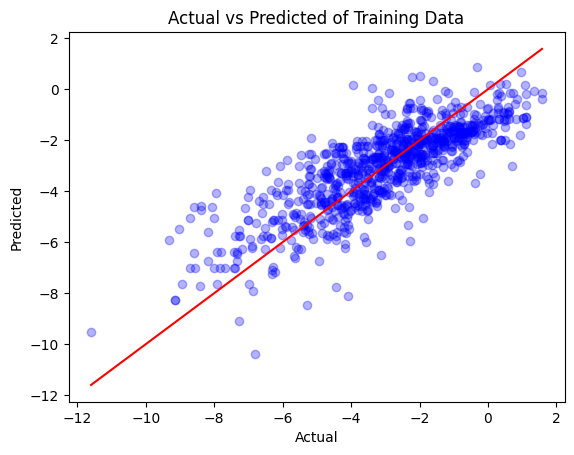

In [121]:
plb.scatter(ytrain,ytrainpred,c="blue",alpha=0.3)
plb.xlabel("Actual")
plb.ylabel("Predicted")
plb.title("Actual vs Predicted of Training Data")
z=np.linspace(min(ytrain),max(ytrain))
plb.plot(z,z,c="red")

The data points are clustered around teh trend line indicating a moderate fit.

The clustering of points around the line implies a decent fit of the model, though some variability exists.

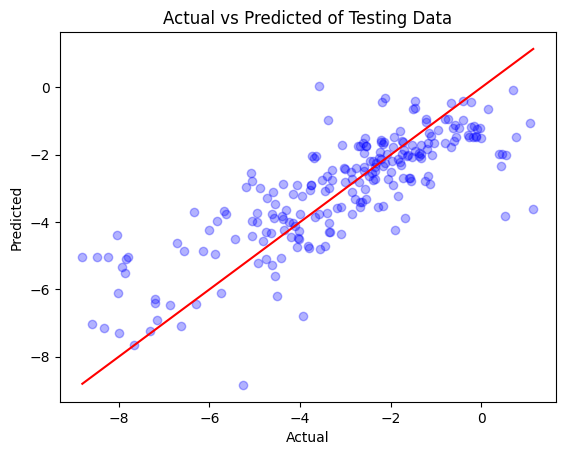

In [122]:
plb.scatter(ytest,ytest_pred,c="blue",alpha=0.3)
plb.xlabel("Actual")
plb.ylabel("Predicted")
plb.title("Actual vs Predicted of Testing Data")
z=np.linspace(min(ytest),max(ytest))
plb.plot(z,z,c="red")

The model captures the trend in the testing data moderately good, suggesting the model is successful in finding a relationship between the dependent and independent variables.

**Observations**

From the above graphs it is evident the model is neither overfitting nor under fitting the data set, the linear regression model is acceptable for the given data set and there lies a linear relationship between the dependent variable and the independent variables

### MSE and R2 error for training and testing dataset

In [123]:
mse_train=mean_squared_error(ytrain,ytrainpred)
r2_train=r2_score(ytrain,ytrainpred)
mse_test=mean_squared_error(ytest,ytest_pred)
r2_test=r2_score(ytest,ytest_pred)

df=pd.DataFrame([[mse_train,mse_test],[r2_train,r2_test]],index=["MSE","R2"],columns=["Training Set","Testing Set"])
df

,Training Set,Testing Set
MSE,1.522073,1.684683
R2,0.646600,0.643589


#**Comments on the finding**


*   Training Dataset

 1. MSE is 1.522073 which represents the average squared difference between the actual value and the predicted value in the training dataset is moderate, hence the model has a decent fit on the training data.
 2. R-Square is 0.64660 , representing 64.6 % of the variability in the training data can be explained by the model. Further conforming a moderately good fit.
*   Testing Dataset
 1. MSE is 1.684683 which is slightly higher than the mse of the training data which indicates the model is working moderately well on unseen data.
 2. R-Squared is 0.643589 indicating approximately 64.3 % of the variance of the test data can be explained using the model, indicating the model is neither overfitting nor underfitting the dataset.

 Conclusion:
 The similar R squared value for training and testind dataset indicates the model is neither underfitting nor overfitting the data set,and the linear regression model is effective to find the relationship
